# Imports

In [1]:
# std lib imports
import os
from glob import glob
from prettytable import PrettyTable

# custom imports
from reading_util import *
from plotting_util import *
from result import *

## string constants

In [2]:
data_sets = {
    'qcdSideTrain' : 'qcd_sqrtshatTeV_13TeV_PU40_SIDEBAND_trainingset',
    'qcdSideAll' : 'qcd_sqrtshatTeV_13TeV_PU40_SIDEBAND_ALL',
    'GtoWW1': 'RSGraviton_WW_NARROW_13TeV_PU40_1.5TeV',
    'GtoWW2': 'RSGraviton_WW_NARROW_13TeV_PU40_2.5TeV',
    'GtoWW3': 'RSGraviton_WW_NARROW_13TeV_PU40_3.5TeV',
    'GtoWW4': 'RSGraviton_WW_NARROW_13TeV_PU40_4.5TeV',
    'AtoHZ': 'AtoHZ_to_ZZZ_13TeV_PU40/',
    'GtoTTBroad': 'RSGraviton_tt_BROAD_13TeV_PU40',
    'GtoTTNarr': 'RSGraviton_tt_NARROW_13TeV_PU40'
    
}

data_suffixes = {
    'qcdSideTrain' : 'qcd_side_train',
    'qcdSideAll' : 'qcd_side_all',
    'GtoWW1': 'RSG_to_WW_1.5',
    'GtoWW2': 'RSG_to_WW_2.5',
    'GtoWW3': 'RSG_to_WW_3.5',
    'GtoWW4': 'RSG_to_WW_4.5',
    'AtoHZ': 'AtoHZ_to_ZZZ',
    'GtoTTBroad': 'RSG_to_tt_broad',
    'GtoTTNarr': 'RSG_to_tt_narrow'
        
}

In [3]:
data_set = 'AtoHZ'
data_suffix = data_suffixes[ data_set ]
title_suffix = data_suffix.replace('_',' ')
vae_model = 'std_normalized'
base_dir = os.path.join('/eos/project/d/dshep/TOPCLASS/DijetAnomaly/VAE_results/', vae_model)
input_dir = os.path.join( base_dir, data_sets[data_set] )
fig_dir = os.path.join( 'fig/pt_loss_correlations', vae_model, data_suffix )

# Function definitions

In [4]:
def get_bin_indices( jet_pt ):
    idx_b0 = np.flatnonzero( jet_pt < 1000 )
    idx_b1 = np.flatnonzero((jet_pt >= 1000) & (jet_pt < 1500))
    idx_b2 = np.flatnonzero((jet_pt >= 1500) & (jet_pt < 2000))
    idx_b3 = np.flatnonzero((jet_pt >= 2000) & (jet_pt < 2500))
    idx_b4 = np.flatnonzero((jet_pt >= 2500) & (jet_pt < 3000))
    idx_b5 = np.flatnonzero((jet_pt >= 3000) & (jet_pt < 4000))
    idx_b6 = np.flatnonzero(jet_pt >= 4000)
    return [idx_b0,idx_b1,idx_b2,idx_b3,idx_b4,idx_b5,idx_b6]


def plot_num_events_per_bin( bin_counts, title, plotname ):
    num_evts_per_bin = [ len(b) for b in bin_counts ]
    x = np.arange(len(num_evts_per_bin))
    fig, ax = plt.subplots()
    plt.bar(x, num_evts_per_bin)
    for i, n, in enumerate(num_evts_per_bin):
        plt.text(i, n + 10, str(n), va='center')
    plt.xticks(x, bin_labels, rotation=30)
    ax.set_yscale('log')
    plt.title(title)
    plt.tight_layout()
    fig.savefig(os.path.join(fig_dir, plotname + '.png'))


# Input setup

In [5]:
data = read_in_data( input_dir )
results = Result(data)

Labels:
[b'mJJ', b'j1Pt', b'j1Eta', b'j1Phi', b'j1M', b'j1E', b'j2Pt', b'j2M', b'j2E', b'DeltaEtaJJ', b'DeltaPhiJJ', b'j1TotalLoss', b'j1RecoLoss', b'j1KlLoss', b'j2TotalLoss', b'j2RecoLoss', b'j2KlLoss']
[--------------------]  0% - ETA: 11.3 min 
num files read in dir  /eos/project/d/dshep/TOPCLASS/DijetAnomaly/VAE_results/std_normalized/AtoHZ_to_ZZZ_13TeV_PU40/ :  98


In [6]:
print( '# events read: ', data.shape[0] / 1e6, 'M')

# events read:  0.063128 M


## plot general jet feature distributions

/afs/cern.ch/user/k/kiwoznia/dev/convVAE_2D/goodness_of_fit/plotting_util.py:24: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist( data, bins=bin_num, normed=True, alpha=alpha, histtype='step', linewidth=1.5, label=legend )


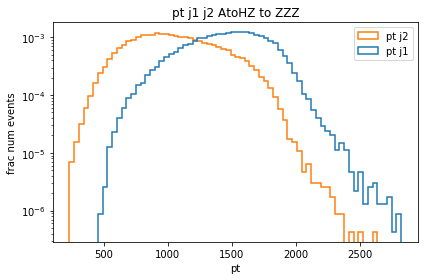

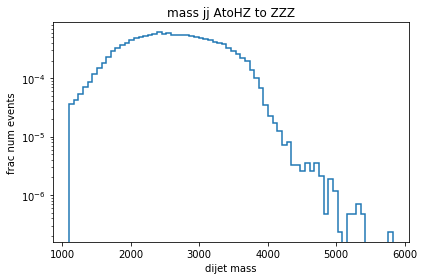

In [7]:
# plot pt dist
plot_hist([results.pt_j1(), results.pt_j2()], 'pt', 'frac num events', 'pt j1 j2 ' + title_suffix, 'results_hist_pt_j1_j2_'+data_suffix, fig_dir, ['pt j1', 'pt j2'])  # data, xlabel, ylabel, title, plotname
# plot mass dist
plot_hist(results.mass_jj(), 'dijet mass', 'frac num events', 'mass jj ' + title_suffix, 'results_mass_jj_'+data_suffix, fig_dir)


## bin pt and count events

In [10]:
### count events with jet-pt > 3000 ###

pt_threshold = 2500
j1_pt_gt_thr = (results.pt_j1() > pt_threshold).sum()
j2_pt_gt_thr = (results.pt_j2() > pt_threshold).sum()
t = PrettyTable()
t.add_column('pt j1 > ' + str(pt_threshold), [j1_pt_gt_thr])
t.add_column('pt j2 > ' + str(pt_threshold), [j2_pt_gt_thr])
print(t)


+--------------+--------------+
| pt j1 > 2500 | pt j2 > 2500 |
+--------------+--------------+
|      39      |      2       |
+--------------+--------------+


## plot pt binned event distribution jet 1

In [11]:
first_bin = 1

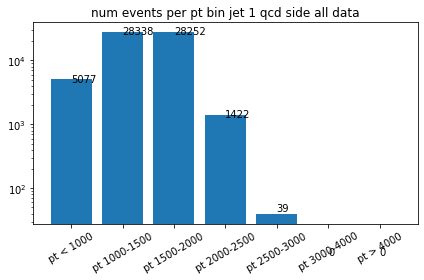

In [12]:
### plot pt-binned loss distribution ###
bin_labels = ['pt < 1000','pt 1000-1500','pt 1500-2000','pt 2000-2500','pt 2500-3000','pt 3000-4000','pt > 4000']
### histogram number of events in each pt bin j1 ###
idx_b0, idx_b1,idx_b2,idx_b3,idx_b4,idx_b5,idx_b6 = get_bin_indices( results.pt_j1() )
plot_num_events_per_bin([idx_b0, idx_b1,idx_b2,idx_b3,idx_b4,idx_b5,idx_b6],'num events per pt bin jet 1 qcd side all data','pt_bin_event_count_j1_'+data_suffix)

## plot loss distribution for each pt bin (jet 1)

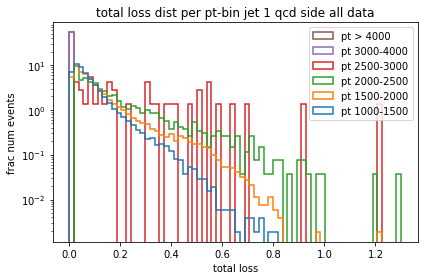

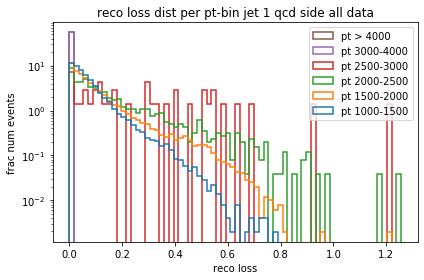

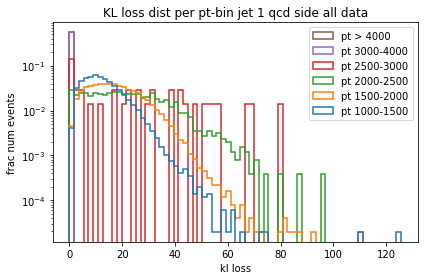

In [13]:
# total loss j1
losses = results.loss_total_j1()
losses = [losses[idx_b0], losses[idx_b1],losses[idx_b2],losses[idx_b3],losses[idx_b4],losses[idx_b5],losses[idx_b6]]
losses = [l if l.size else [0] for l in losses]
plot_hist( losses[first_bin:], 'total loss', 'frac num events', 'total loss dist per pt-bin jet 1 qcd side all data','pt_binned_total_loss_dist_j1_'+data_suffix, fig_dir, bin_labels[first_bin:])

# reco loss j1
losses = results.loss_reco_j1()
losses = [losses[idx_b0], losses[idx_b1],losses[idx_b2],losses[idx_b3],losses[idx_b4],losses[idx_b5],losses[idx_b6]]
losses = [l if l.size else [0] for l in losses]
plot_hist( losses[first_bin:], 'reco loss', 'frac num events', 'reco loss dist per pt-bin jet 1 qcd side all data','pt_binned_reco_loss_dist_j1_'+data_suffix, fig_dir, bin_labels[first_bin:])

# kl loss j1
losses = results.loss_kl_j1()
losses = [losses[idx_b0], losses[idx_b1],losses[idx_b2],losses[idx_b3],losses[idx_b4],losses[idx_b5],losses[idx_b6]]
losses = [l if l.size else [0] for l in losses]
plot_hist( losses[first_bin:], 'kl loss', 'frac num events', 'KL loss dist per pt-bin jet 1 qcd side all data','pt_binned_kl_loss_dist_j1_'+data_suffix, fig_dir, bin_labels[first_bin:])

## plot pt binned event distribution jet 2

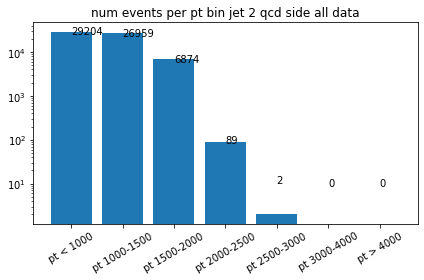

In [14]:
### histogram number of events in each pt bin j2 ###
idx_b0, idx_b1,idx_b2,idx_b3,idx_b4,idx_b5,idx_b6 = get_bin_indices( results.pt_j2() )
plot_num_events_per_bin([idx_b0,idx_b1,idx_b2,idx_b3,idx_b4,idx_b5,idx_b6],'num events per pt bin jet 2 qcd side all data','pt_bin_event_count_j2_'+data_suffix)

## plot loss distribution for each pt bin (jet 2)

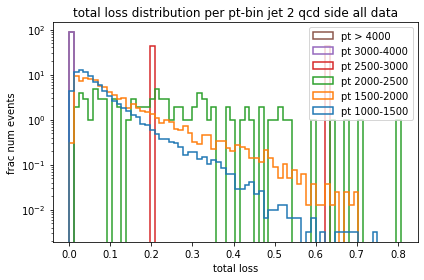

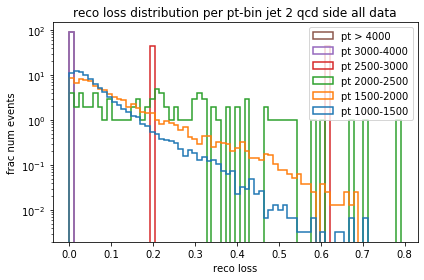

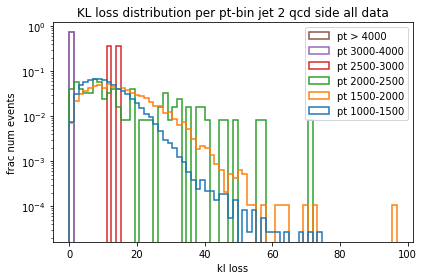

In [15]:
# total loss j2
losses = results.loss_total_j2()
losses = [losses[idx_b0], losses[idx_b1],losses[idx_b2],losses[idx_b3],losses[idx_b4],losses[idx_b5],losses[idx_b6]]
losses = [l if l.size else [0] for l in losses]
plot_hist( losses[first_bin:], 'total loss', 'frac num events', 'total loss distribution per pt-bin jet 2 qcd side all data','pt_binned_total_loss_dist_j2_'+data_suffix, fig_dir, bin_labels[first_bin:])

# reco loss j2
losses = results.loss_reco_j2()
losses = [losses[idx_b0], losses[idx_b1],losses[idx_b2],losses[idx_b3],losses[idx_b4],losses[idx_b5],losses[idx_b6]]
losses = [l if l.size else [0] for l in losses]
plot_hist( losses[first_bin:], 'reco loss', 'frac num events', 'reco loss distribution per pt-bin jet 2 qcd side all data','pt_binned_reco_loss_dist_j2_'+data_suffix, fig_dir, bin_labels[first_bin:])

# kl loss j2
losses = results.loss_kl_j2()
losses = [losses[idx_b0], losses[idx_b1],losses[idx_b2],losses[idx_b3],losses[idx_b4],losses[idx_b5],losses[idx_b6]]
losses = [l if l.size else [0] for l in losses]
plot_hist( losses[first_bin:], 'kl loss', 'frac num events', 'KL loss distribution per pt-bin jet 2 qcd side all data','pt_binned_kl_loss_dist_j2_'+data_suffix, fig_dir, bin_labels[first_bin:])
